In [25]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [26]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)


In [27]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)


In [28]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)


In [29]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')],
)

testing = model.fit(
    ds_train,
    epochs=10,
    validation_data=ds_test,
)


Epoch 1/10
469/469 [==============================] - 2s 1ms/step - loss: 0.3559 - accuracy: 0.9034 - val_loss: 0.1975 - val_accuracy: 0.9446
Epoch 2/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1652 - accuracy: 0.9536 - val_loss: 0.1453 - val_accuracy: 0.9571
Epoch 3/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1191 - accuracy: 0.9659 - val_loss: 0.1108 - val_accuracy: 0.9669
Epoch 4/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0919 - accuracy: 0.9734 - val_loss: 0.0938 - val_accuracy: 0.9716
Epoch 5/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0739 - accuracy: 0.9793 - val_loss: 0.0822 - val_accuracy: 0.9751
Epoch 6/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0614 - accuracy: 0.9827 - val_loss: 0.0796 - val_accuracy: 0.9757
Epoch 7/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0513 - accuracy: 0.9854 - val_loss: 0.0768 - val_accuracy: 0.9756
Epoch 

<function matplotlib.pyplot.show(close=None, block=None)>

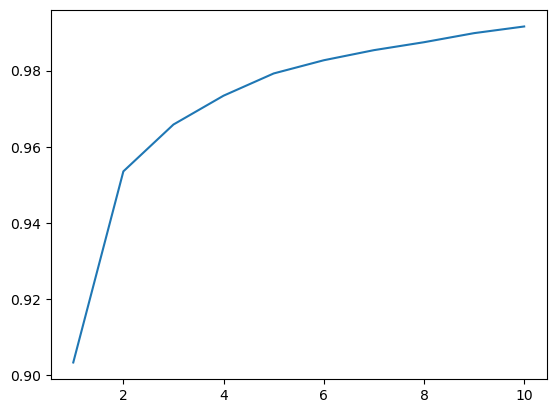

In [31]:

plt.plot(
    np.arange(1, 11), 
    testing.history['accuracy'], label='Accuracy'
)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

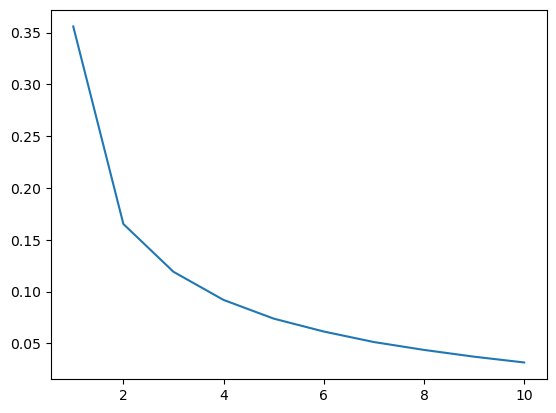

In [32]:
plt.plot(
    np.arange(1, 11), 
    testing.history['loss'], label='Loss'
)
plt.show

In [33]:
model.evaluate(ds_test)


79/79 [==============================] - 0s 557us/step - loss: 0.0721 - accuracy: 0.9773


[0.07214028388261795, 0.9772999882698059]